# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
data = pd.read_csv('/workspaces/Data-Science/Dataset/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


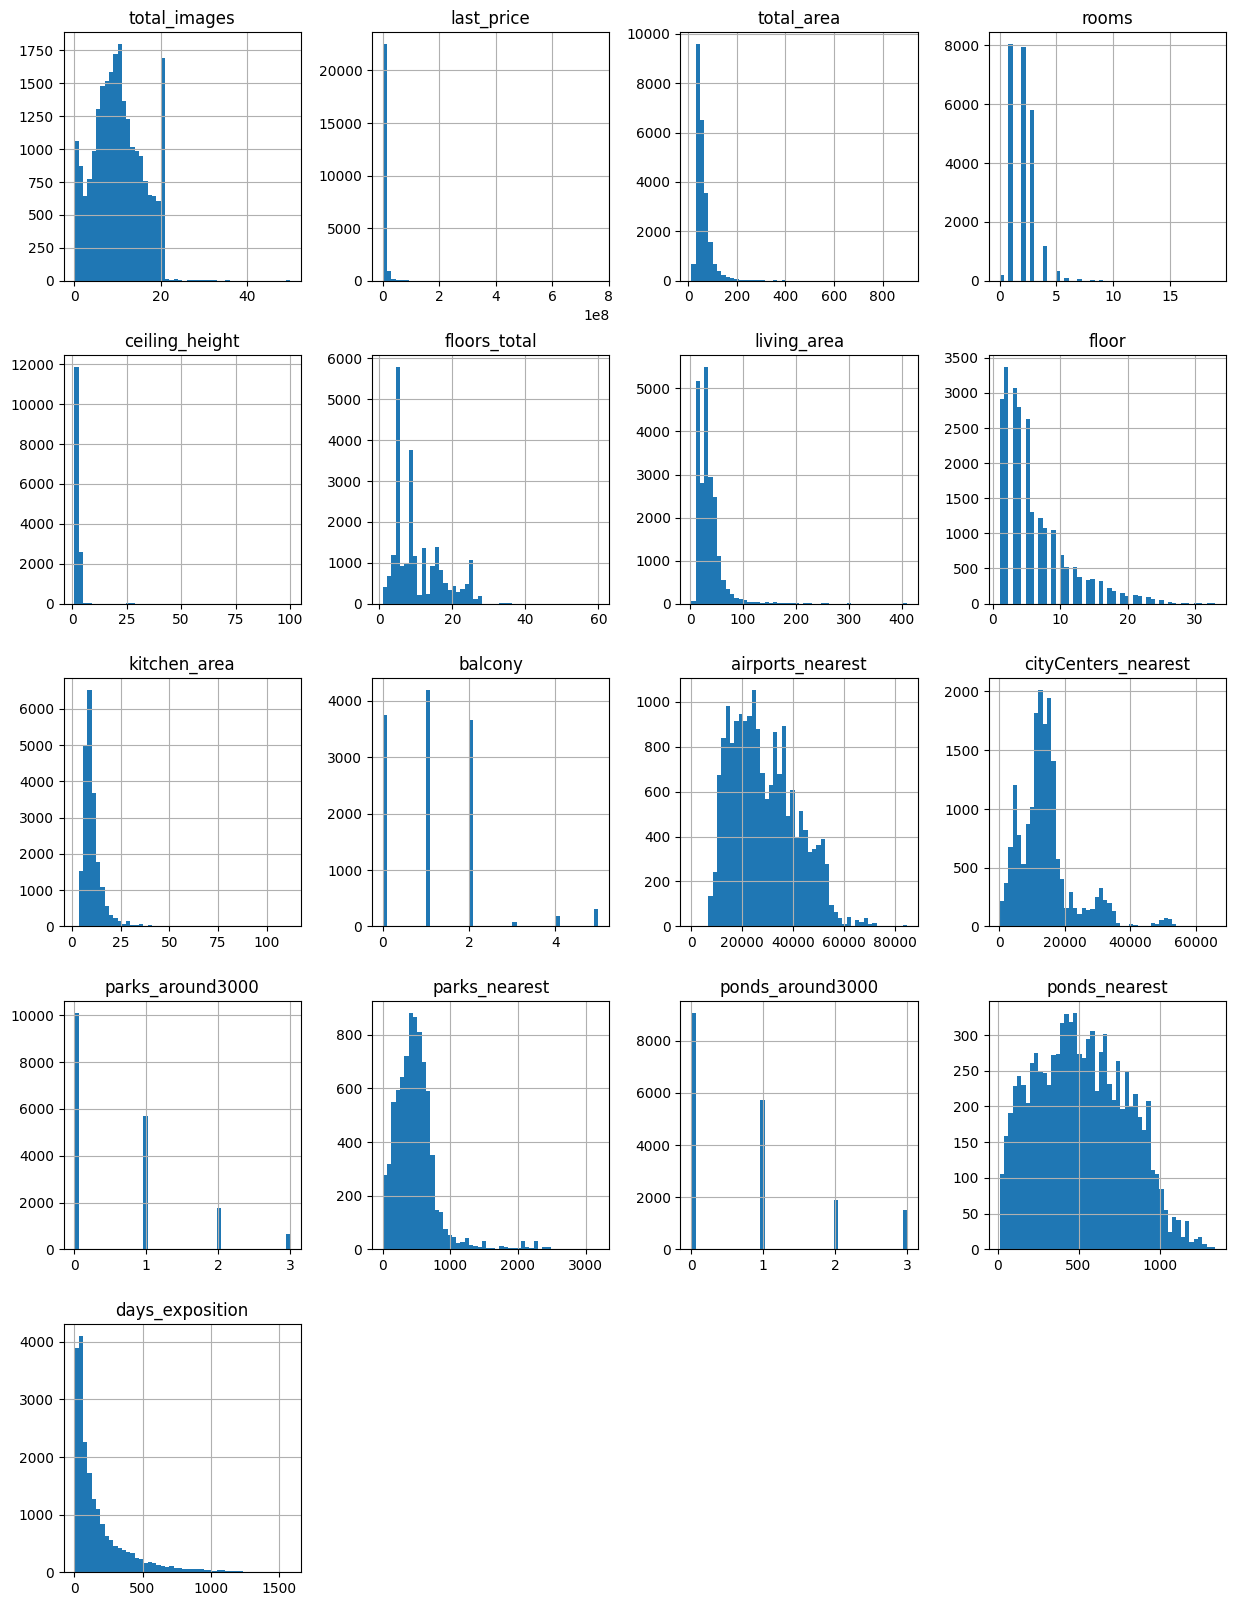

In [4]:
data.hist(bins=50, figsize=(15, 20));#построили общую гистограмму для всех числовых столбцов

## Предобработка данных

### Обработка пропусков

In [5]:
data.isna().sum()# определил стобцы с пропусками

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['is_apartment'].unique()#определили пропущение значения колонки 'is_apartment'

array([nan, False, True], dtype=object)

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False) #Заменили пропущеные значение на False, т.к. раз не указали значит не аппартаменты
data['is_apartment'].unique()#проверили значения в колонке 'is_apartment'

array([False,  True])

In [8]:
data['ceiling_height'][data['ceiling_height']>13].unique()#уникальные значения с высотой потолков более 13 метров

array([ 25. ,  32. ,  27. ,  24. ,  26. ,  14. ,  20. ,  22.6,  27.5,
       100. ])

In [9]:
q = data["ceiling_height"].isin([ 25. ,  32. ,  27. ,  24. ,  26. ,  14. ,  20. ,  22.6,  27.5,
       100. ]) #создаем словарь с выбивающимися значениями
#заменяем их на соответствующее логике
data.loc[q, "ceiling_height"] = data.loc[q, "ceiling_height"].map({ 25. :2.5, 32. :3.2,  27. :2.7,
                                                                   24. :2.4,  26. :2.6,  14. :1.4, 
                                                                   20. :2.0,  22.6:2.6,  27.5:2.75, 100. :10})

In [10]:
data['ceiling_height'].unique() #провереяем уникальные значения 

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [11]:
data.groupby('is_apartment')['ceiling_height'].median() #проверяем среднии значения в случаи свободной планировки

is_apartment
False    2.65
True     3.00
Name: ceiling_height, dtype: float64

In [12]:
building_layout = data.groupby('is_apartment')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(building_layout)#присваиваем медиальное значение в зависимости от планировки
data['ceiling_height'].isna().sum()#проверяем пропуски в колонке 'ceiling_height'

0

In [13]:
data['balcony'].unique()#провереяем уникальные значения 'balcony'

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [14]:
data['balcony'] = data['balcony'].fillna(0)#Заменили пропущеные значение на ноль.
data['balcony'].isna().sum()#проверяем пропуски в 'balcony'

0

In [15]:
data['locality_name'] = data['locality_name'].fillna('unknown')#Заменяем пропуски в колонке города на 'unknown'
data['locality_name'].isna().sum()

0

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#исправили дату в формат datetime
data['first_day_exposition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23699 entries, 0 to 23698
Series name: first_day_exposition
Non-Null Count  Dtype         
--------------  -----         
23699 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 185.3 KB


In [17]:
data['year'] = data['first_day_exposition'].dt.year

<AxesSubplot: >

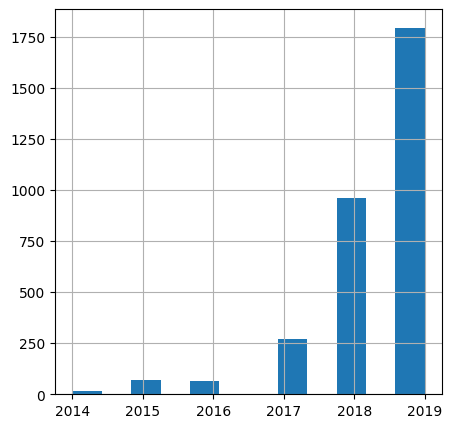

In [18]:
data['year'][data['days_exposition'].isna()].hist(bins=12, figsize=(5, 5))#пропуски по годам

In [19]:
data.pivot_table(index='year', values='first_day_exposition', 
                 aggfunc='count') #строим сводную таблицу по годам пропуски

,first_day_exposition
year,
2014,137
2015,1191
2016,2783
2017,8190
2018,8519
2019,2879


In [20]:
data["is_days_exposition_missing"] = data.days_exposition.isna().astype(int)
data.query('year == 2019').pivot_table(index='first_day_exposition', values='is_days_exposition_missing', 
                                       aggfunc='count').sort_values(by='is_days_exposition_missing', 
                                                                    ascending=False).head(10)
#Сводная таблица за 2019 год по дням с количеством пропусков. 

,is_days_exposition_missing
first_day_exposition,
2019-04-04,54
2019-03-26,53
2019-04-18,50
2019-03-18,50
2019-02-26,50
2019-04-22,50
2019-04-01,49
2019-03-13,48
2019-02-12,47


К пропускам могли привести причины заполнения - человеческий фактор или ошибка машиного кода:   
1. В колонке аппартаменты (булевый тип) заменили отсутствующие значения на False, раз не указали значит не аппартаменты.
2. Не знают высоту своих потолков, поэтому не указали. Берем медиальное значение в зависимости от планировки, перед этим исправив аномалии, для точного анализа.
3. В колонке балконах при их отсутствии оставили нулевое значение.
4. Если объявление убрали раньше, чем прошел день и округлили не большую сторону. 
5. Заменяем пропуски в колонке города на 'unknown'.
6. Чем больше становилось объявлений, тем больше пропусков, за исключением 2019 года. Там резко увеличилось количество пропусков, которых больше половины всех данных в этом году. На пропуски не как не влияет день года.

### Типы данных

In [21]:
data = data.astype({'last_price':'int', 'balcony':'int'})# количество балконов целое число как и цена

In [22]:
data.info()# провереяем типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23699 non-null  int64         
 1   last_price                  23699 non-null  int64         
 2   total_area                  23699 non-null  float64       
 3   first_day_exposition        23699 non-null  datetime64[ns]
 4   rooms                       23699 non-null  int64         
 5   ceiling_height              23699 non-null  float64       
 6   floors_total                23613 non-null  float64       
 7   living_area                 21796 non-null  float64       
 8   floor                       23699 non-null  int64         
 9   is_apartment                23699 non-null  bool          
 10  studio                      23699 non-null  bool          
 11  open_plan                   23699 non-null  bool      

Расмотрели типы данных в каждом столбце:
1. Исправили формат времени (при устранении пропусков)
2. Поменяли формат на целое в цене и количестве балконов, это логично.
3. При исправление пропусков изменились значения на bool 'is_apartment'

### Дубликаты

In [23]:
data.duplicated().sum()

0

In [24]:
data['locality_name'].unique()#провереяем уникальные значения 'locality_name'
sort_locality = data.sort_values(by='locality_name', ascending=True)
sort_locality['locality_name'].unique()

array(['unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [25]:
sort_locality = data.sort_values(by='locality_name', ascending=True)
len(sort_locality['locality_name'].unique())#количество уникальных названий

365

In [26]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name'].str.replace('ё', 'е'), errors='ignore')
# заменили в названиях ё на е
sort_locality = data.sort_values(by='locality_name', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

331

In [27]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('поселок городского типа ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

331

In [28]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('городской поселок ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

324

In [29]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('поселок ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

321

In [30]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('деревня ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

314

In [31]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('село ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

312

In [32]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('садоводческое некоммерческое товарищество ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

312

In [33]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('садовое товарищество ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

310

In [34]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('имени ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

310

In [35]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('станции ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

309

In [36]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('при железнодорожной станции ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

309

In [37]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('при железнодорожной ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

307

In [38]:
data['locality_name_rev'] = pd.to_numeric(data['locality_name_rev'].str.replace('коттеджный ', ''), errors='ignore')
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
len(sort_locality['locality_name_rev'].unique())#количество уникальных названий

306

In [39]:
data['locality_name_rev'].unique()
sort_locality = data.sort_values(by='locality_name_rev', ascending=True)
sort_locality['locality_name_rev'].unique()

array(['unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

Узучили уникальные занчения в столбце название населенных пунктов и в новой колонке 'locality_name_rev' удалили неявные дубликаты, сократив количество уникальных значений на 59 наименований.

In [40]:
data.describe()#исследуем выбросы

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,is_days_exposition_missing
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.698292,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,2017.367146,0.134225
std,5.682529,1.088701e+07,35.654083,1.078405,0.242509,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,1.039771,0.340901
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,2017.000000,0.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,2017.000000,0.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,2018.000000,0.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,1.000000


Фильтрация на основе межквартильного размаха это хорошее решение

In [41]:
# функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    dfq = data.loc[(data[column] < q3 + 1.5*iqr) & (data[column] > q1 - 1.5*iqr), column]
    return dfq
list_features = ['last_price', 'total_area', 'kitchen_area', 'ceiling_height', 'living_area',
                 'floors_total','living_area', 'days_exposition', 'floor', 'kitchen_area', 
                 'balcony', 'rooms']# столбцы с выбросами
for col in list_features:
    data[col] = quartile_range(data, col)

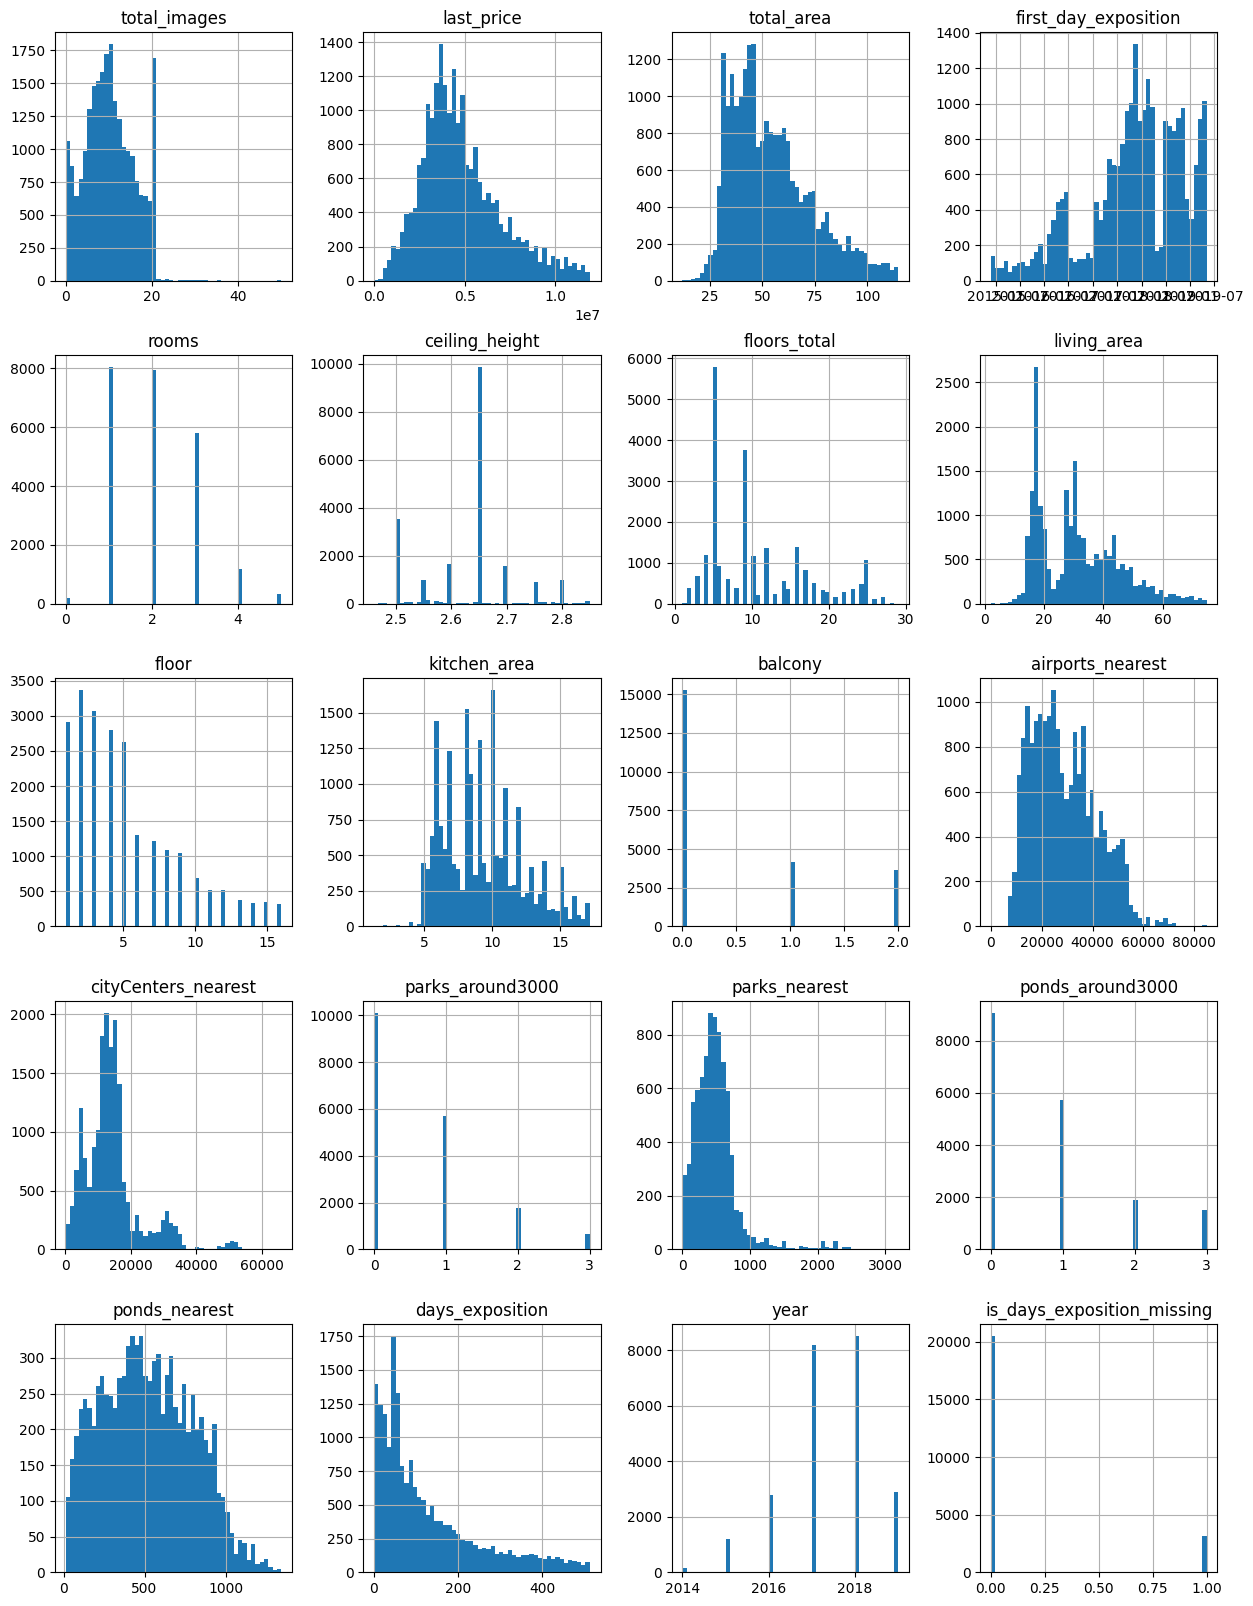

In [42]:
data.hist(bins=50, figsize=(15, 20));#построили общую гистограмму

Нашли и устранили редкии и аномальные значения
1. Исправили значения в высоте балконов
2. Удалили редкие и выбивающиеся занчения проанализировав через метод .describe() по аналогии с тем, как это реализовано в диаграмме размаха.
3. Все особенности отлично видны на диограммах .hist():

Под фильрацию с учетом 1.5 размаха попала только верхняя граница, т.к. любое значение будет больше отрицательного data[column] > q1 - 1.5*iqr или data[column] > 12200 - 1.5*3400000 = −5087800. Будем учитывать это в дольнейшем.

In [43]:
data['last_price'].describe()#исследуем last_price

count    2.163800e+04
mean     4.839970e+06
std      2.217341e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.189440e+07
Name: last_price, dtype: float64

### Посчитаем и добавим в таблицу новые столбцы

In [44]:
data['price_meter'] = data['last_price']/data['total_area']#цена квадратного метра

In [45]:
data["weeknum"] = data["first_day_exposition"].dt.dayofweek #день недели

In [46]:
data["month"] = data["first_day_exposition"].dt.month#месяц

In [47]:
data["year"] = data["first_day_exposition"].dt. year#год уже находили в предыдущих заданиях

In [48]:
data["type_floor"] = "другой" # инициализируем новый столбец
is_first = data["floor"] == 1 
data.loc[is_first, "type_floor"] = "первый" # расставляем первые этажы
is_last = data["floor"] == data["floors_total"]
data.loc[is_last, "type_floor"] = "последний" # расставляем последние этажи

In [49]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()# растояние до центра города
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(-1)#для пропусков выбираем особое значение -1 
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype(int) 

In [50]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,year,is_days_exposition_missing,locality_name_rev,price_meter,weeknum,month,type_floor,cityCenters_nearest_km
0,20,NaN,108.0,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,755.0,NaN,2019,1,Санкт-Петербург,NaN,3,3,другой,16
1,7,3350000.0,40.4,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,NaN,81.0,2018,0,Шушары,82920.792079,1,12,первый,19
2,10,5196000.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,574.0,NaN,2015,0,Санкт-Петербург,92785.714286,3,8,другой,14
3,0,NaN,NaN,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,234.0,424.0,2015,0,Санкт-Петербург,NaN,4,7,другой,7
4,2,10000000.0,100.0,2018-06-19,2.0,NaN,14.0,32.0,13.0,False,...,48.0,121.0,2018,0,Санкт-Петербург,100000.000000,1,6,другой,8


## Проведите исследовательский анализ данных

In [51]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,is_days_exposition_missing,price_meter,weeknum,month,cityCenters_nearest_km
count,23699.000000,2.163800e+04,22459.000000,23504.000000,20739.000000,23581.000000,20925.000000,22550.000000,19798.000000,23131.00000,...,8079.000000,18181.000000,9110.000000,18849.000000,23699.000000,23699.000000,21459.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,4.839970e+06,54.364907,2.030250,2.631244,10.638947,31.343952,5.163503,9.317711,0.49773,...,490.804555,0.770255,517.980900,128.753886,2017.367146,0.134225,92055.558904,2.569307,6.400101,10.648593
std,5.682529,2.217341e+06,19.385325,0.973667,0.081328,6.530499,13.636430,3.707581,2.879342,0.75259,...,342.317995,0.938346,277.720643,121.531193,1.039771,0.340901,29559.333928,1.789082,3.491561,9.906725
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.00000,...,1.000000,0.000000,13.000000,1.000000,2014.000000,0.000000,111.834862,0.000000,1.000000,-1.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.00000,...,288.000000,0.000000,294.000000,41.000000,2017.000000,0.000000,74668.618838,1.000000,3.000000,2.000000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.00000,...,455.000000,1.000000,502.000000,85.000000,2017.000000,0.000000,92721.372276,3.000000,6.000000,11.000000
75%,14.000000,6.000000e+06,65.600000,3.000000,2.650000,16.000000,40.700000,7.000000,11.000000,1.00000,...,612.000000,1.000000,729.000000,183.000000,2018.000000,0.000000,109375.000000,4.000000,10.000000,15.000000
max,50.000000,1.189440e+07,114.600000,5.000000,2.850000,29.000000,74.800000,16.000000,17.200000,2.00000,...,3190.000000,3.000000,1344.000000,512.000000,2019.000000,1.000000,312240.000000,6.000000,12.000000,66.000000


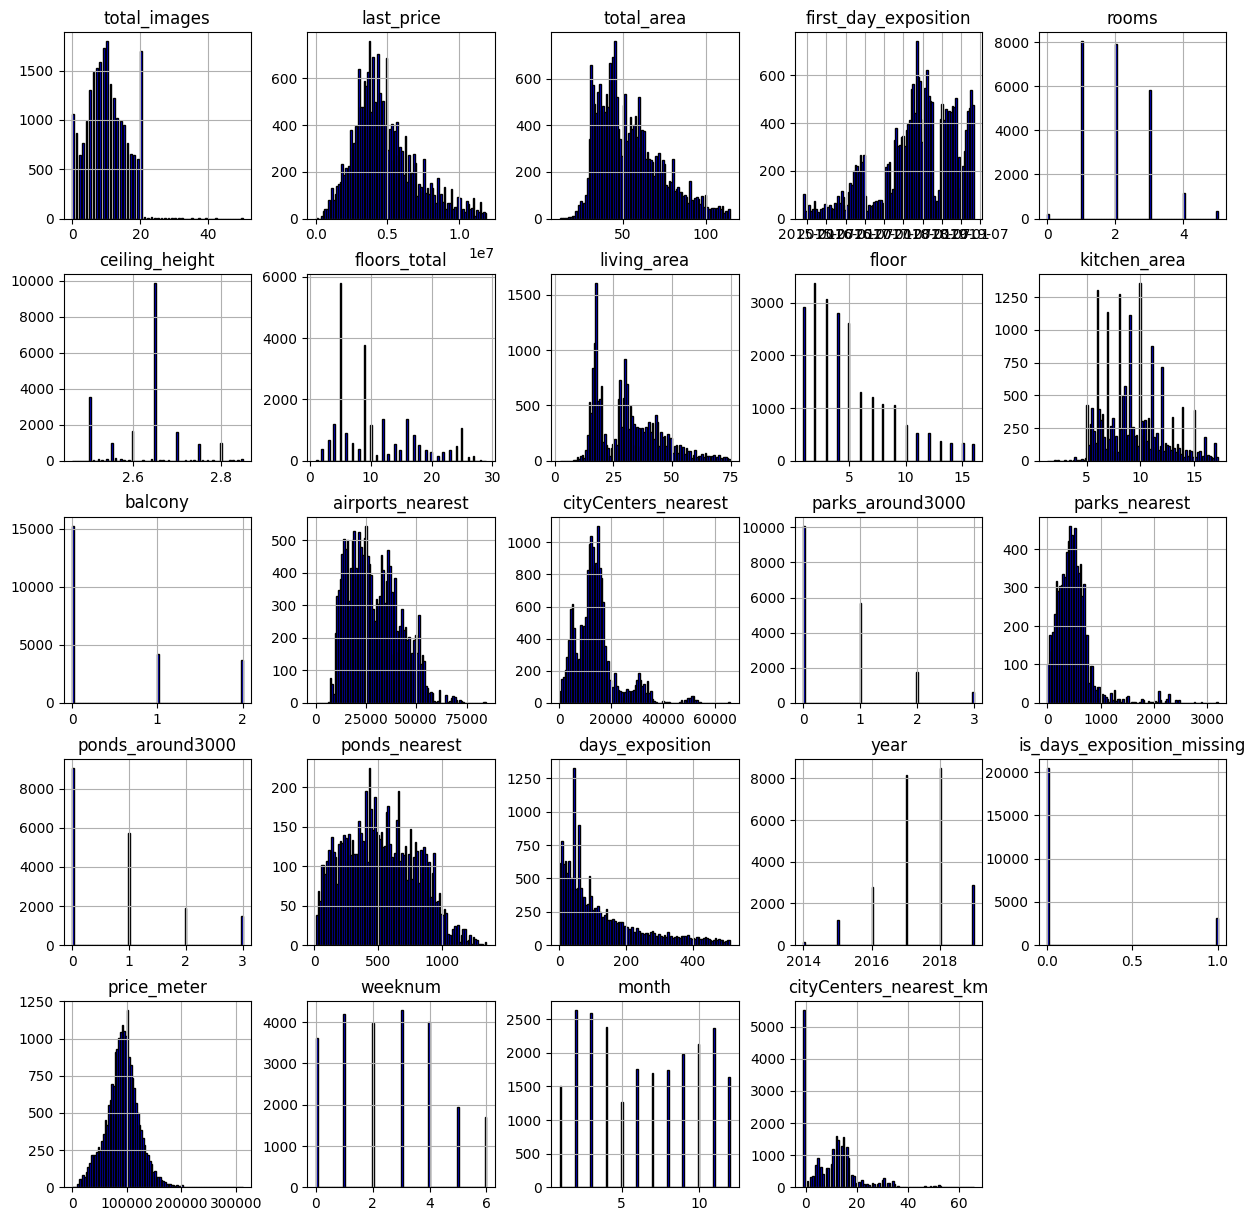

In [52]:
data.hist(bins=100, figsize=(15,15),  color='blue', edgecolor='black');#Построили гистограммы для каждого значения


In [53]:
data["type_floor"].describe()#тип этажа

count      23699
unique         3
top       другой
freq       17658
Name: type_floor, dtype: object

In [54]:
data["weeknum"].describe()#день недели

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weeknum, dtype: float64

### Исследуем параметры:

1. Общая площадь 'total_area' от 12 до 114.6 кадратных метров, с медианной площадью 54.36 кадратных метров
2. Жилая площадь 'living_area' от 2 до 74.8 кадратных метров, с медианной площадью 31.34 кадратных метров
3. Площадь кухни 'kitchen_area' от 1.3 до 17.2 кадратных метров, с медианной площадью 9.32 кадратных метров
4. Цена объекта 'last_price' от 12190 до 11 894 400, с медианной стоимостью 4 839 970
5. Колисчество комнат 'rooms' от 0 до 5 комнат, с медианным количеством 2 комнаты
6. Высота потолков 'ceiling_height' от 2.46 м до 2.85, с медиальной высотой 2.63 м
7. Этаж квартиры 'floor' от 1 до 16, с медиальным этажом 5 
8. Тип этажа картиры больше вего 'другой', с медиальным знаением
9. Общее количество этажей в доме 'floors_total' от 1 до 29 с медиальным значением 10,64
10. Расстояние до центра города в метрах 'cityCenters_nearest' от 181 метра до 66 тыс метров, с медиальным значением 14191 метров
11. Расстояние до ближайшего аэропорта 'airports_nearest' от 0 да 84869 метров, с медиальным значением 28794 метра
12. Расстояние до ближайшего парка 'parks_nearest' от 1 до 3190 метров
13. день и месяц публикации объявления: больше всего объявлений опубликовано в средине, вторник

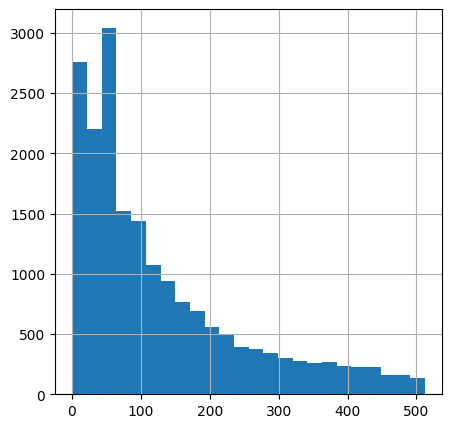

In [55]:
data['days_exposition'].hist(bins=24, figsize=(5, 5));

count    18849.000000
mean       128.753886
std        121.531193
min          1.000000
25%         41.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

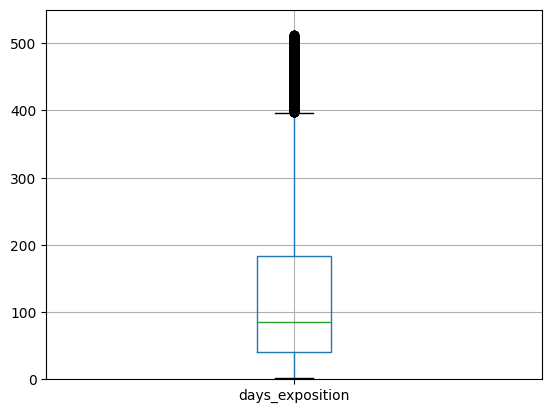

In [56]:
data.boxplot('days_exposition')
plt.ylim(0, 550)
data["days_exposition"].describe()#день недели

### Исследуем скорость продажи квартиры

количество(count) 18849 квартир,  
Медиальное значение(mean) 128.75 дней,  
Среднее(std) 121.5 дней,  
Минимальное(min) 1 день,  
Быстрые продажи(25%) до 41 дня,  
Долгие продажи(75%) больше 183 дней,  
Максимальное(max) 512 дней.  

In [57]:
data['last_price_million'] = data['last_price']/1000000 #колонка с ценой в миллионах

In [58]:
data["last_price_million"].describe()#расмотрим данные в колонке с миллионами

count    21638.000000
mean         4.839970
std          2.217341
min          0.012190
25%          3.300000
50%          4.400000
75%          6.000000
max         11.894400
Name: last_price_million, dtype: float64

In [59]:
def categorize_in(income):
    try:
        if 0.012190 < income <= 2.217341:
            return 'E'
        elif 2.217341 < income <= 4.839970:
            return 'D'
        elif  4.839970 < income <= 6:
            return 'C'
        elif  6 < income <= 8:
            return 'B'
        elif income > 8:
            return 'A'
    except:
        pass


In [60]:
data['price_category'] = data['last_price_million'].apply(categorize_in) #Создаем колонку с категорией цен

In [61]:
area_price = data.groupby('price_category')['total_area'].mean() #сводная таблица цены от общей площади

In [62]:
living_price = data.groupby('price_category')['living_area'].mean() #сводная таблица цены от жилой площади

In [63]:
kitchen_price = data.groupby('price_category')['kitchen_area'].mean() #сводная таблица цены от площади кухни

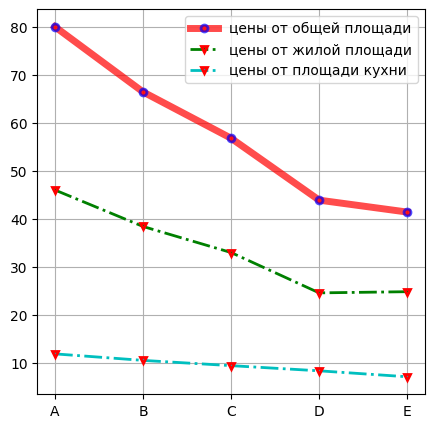

In [64]:
plt.figure(figsize=(5, 5))
plt.plot(area_price, 'o-r', alpha=0.7, label="цены от общей площади", lw=5, mec='b', mew=2, ms=5)
plt.plot(living_price, 'v-.g', label="цены от жилой площади", mec='r', lw=2, mew=2, ms=5)
plt.plot(kitchen_price, 'v-.c', label="цены от площади кухни", mec='r', lw=2, mew=2, ms=5)
plt.legend()
plt.grid(True)

In [65]:
data['last_price_million'].corr(data['total_area'])

0.6938642057648554

In [66]:
data['last_price_million'].corr(data['living_area'])

0.5673596474618738

In [67]:
data['last_price_million'].corr(data['kitchen_area'])

0.4773000989630302

In [68]:
data['rooms'].corr(data['last_price_million'])

0.44924760064808505

При положительной линейной корреляции более 
    высоким значениям одного признака соответствуют более высокие значения другого, 
    а более низким значениям одного признака - низким значения другого.     Следовательно чем больше площадь, тем больше цена. И более всего влияет общая площадь, затем, жилая и кухонная. Аналогично с комнатами.

In [69]:
type_floor_price = data.groupby('type_floor')['last_price_million'].mean() 
type_floor_price#сводная таблица цены от типа этажа

type_floor
другой       5.034689
первый       4.136216
последний    4.428692
Name: last_price_million, dtype: float64

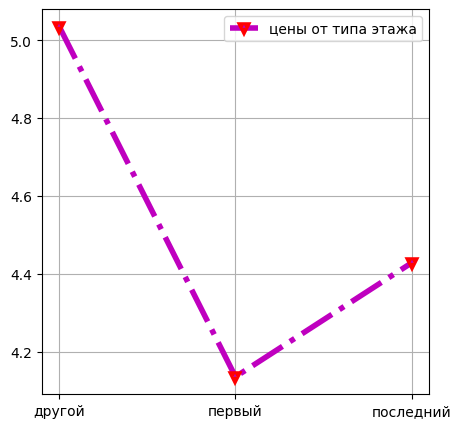

In [70]:
plt.figure(figsize=(5, 5))
plt.plot(type_floor_price, 'v-.m', label="цены от типа этажа", mec='r', lw=4, mew=4, ms=5)
plt.legend()
plt.grid(True)

In [71]:
rooms_price = data.groupby('rooms')['last_price_million'].mean() 
rooms_price#сводная таблица цены от количества комнат

rooms
0.0    2.924265
1.0    3.757323
2.0    5.010301
3.0    5.991030
4.0    6.919001
5.0    8.252059
Name: last_price_million, dtype: float64

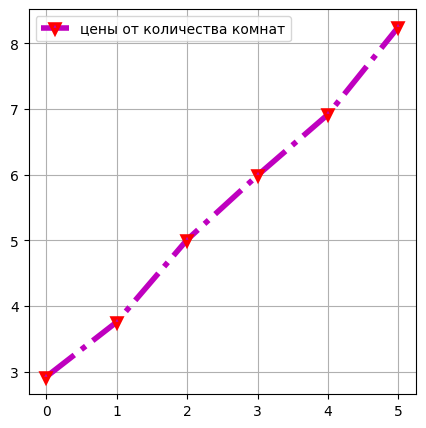

In [72]:
plt.figure(figsize=(5, 5))
plt.plot(rooms_price, 'v-.m', label="цены от количества комнат", mec='r', lw=4, mew=4, ms=5)
plt.legend()
plt.grid(True)

In [73]:
day_price = data.groupby('weeknum')['last_price_million'].count() 
day_price#сводная таблица цены от дня недели

weeknum
0    3293
1    3830
2    3611
3    3870
4    3680
5    1784
6    1570
Name: last_price_million, dtype: int64

In [74]:
month_price = data.groupby('month')['last_price_million'].mean() 
month_price#сводная таблица цены от дня недели

month
1     4.801527
2     4.833719
3     4.803588
4     4.944180
5     4.827289
6     4.676428
7     4.837161
8     4.837321
9     4.948573
10    4.807218
11    4.866079
12    4.857553
Name: last_price_million, dtype: float64

In [75]:
year_price = data.groupby('year')['last_price_million'].mean()
year_price#сводная таблица цены от года

year
2014    5.782435
2015    5.255896
2016    4.795767
2017    4.766928
2018    4.773376
2019    5.100008
Name: last_price_million, dtype: float64

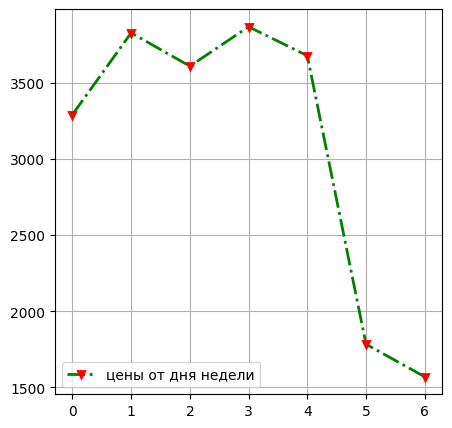

In [76]:
plt.figure(figsize=(5, 5))
plt.plot(day_price, 'v-.g', label="цены от дня недели", mec='r', lw=2, mew=2, ms=5)
plt.legend()
plt.grid(True)

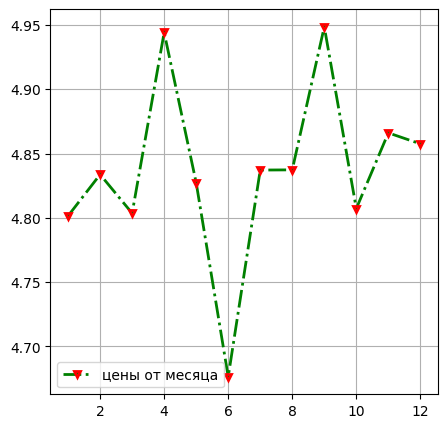

In [77]:
plt.figure(figsize=(5, 5))
plt.plot(month_price, 'v-.g', label="цены от месяца", mec='r', lw=2, mew=2, ms=5)
plt.legend()
plt.grid(True)

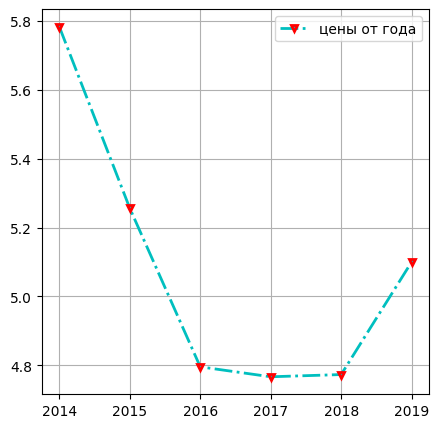

In [78]:
plt.figure(figsize=(5, 5))
plt.plot(year_price, 'v-.c', label="цены от года", mec='r', lw=2, mew=2, ms=5)
plt.legend()
plt.grid(True)

### Факторы больше всего влияют на общую (полную) стоимость объекта

1. Зависит от любой площади. Чем больше площадь тем дороже квартира. Сильнее общая площадь, жилая, слабее влияет площадь кухни. Менее сего зависит от площади в ценовом диапозоне от 2.23 до 4.84 млн
2. Первый и последний этаж сильнее менее предпочтительне, чем другой
3. Чем больше комнат, тем больше площадь и соответственно цена
4. Цены дешевле всего в воскресенье, июне, 2017 года. 

In [79]:
data
#В сводной таблице посчитали медианную цену квадратного метра, количество по населенным пунктам, осортировали по убыванию

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,year,is_days_exposition_missing,locality_name_rev,price_meter,weeknum,month,type_floor,cityCenters_nearest_km,last_price_million,price_category
0,20,NaN,108.00,2019-03-07,3.0,2.70,16.0,51.0,8.0,False,...,2019,1,Санкт-Петербург,NaN,3,3,другой,16,NaN,None
1,7,3350000.0,40.40,2018-12-04,1.0,2.65,11.0,18.6,1.0,False,...,2018,0,Шушары,82920.792079,1,12,первый,19,3.350,D
2,10,5196000.0,56.00,2015-08-20,2.0,2.65,5.0,34.3,4.0,False,...,2015,0,Санкт-Петербург,92785.714286,3,8,другой,14,5.196,C
3,0,NaN,NaN,2015-07-24,3.0,2.65,14.0,NaN,9.0,False,...,2015,0,Санкт-Петербург,NaN,4,7,другой,7,NaN,None
4,2,10000000.0,100.00,2018-06-19,2.0,NaN,14.0,32.0,13.0,False,...,2018,0,Санкт-Петербург,100000.000000,1,6,другой,8,10.000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,NaN,2017-03-21,3.0,NaN,5.0,73.3,3.0,False,...,2017,1,Санкт-Петербург,NaN,1,3,другой,4,9.700,A
23695,14,3100000.0,59.00,2018-01-15,3.0,2.65,5.0,38.0,4.0,False,...,2018,0,Тосно,52542.372881,0,1,другой,-1,3.100,D
23696,18,2500000.0,56.70,2018-02-11,2.0,2.65,3.0,29.7,1.0,False,...,2018,1,Рождествено,44091.710758,6,2,первый,-1,2.500,D
23697,13,11475000.0,76.75,2017-03-28,2.0,NaN,17.0,NaN,12.0,False,...,2017,0,Санкт-Петербург,149511.400651,1,3,другой,10,11.475,A


In [80]:
data.groupby('locality_name')\
            .agg({"price_meter": "mean", "locality_name": "count"})\
            .rename({"locality_name": "number_apartments"}, axis=1)\
            .sort_values(by='price_meter', ascending=False).head(10)
#В сводной таблице посчитали медианную цену квадратного метра, количество по населенным пунктам, осортировали по убыванию

,price_meter,number_apartments
locality_name,,
посёлок Лисий Нос,121616.221359,2
Санкт-Петербург,105684.648442,15721
Зеленогорск,102890.466601,24
Сестрорецк,101262.332858,183
Пушкин,100462.063435,369
Кудрово,99903.345867,173
деревня Мистолово,98549.976709,11
посёлок Левашово,96997.690531,1
Мурино,92722.708914,34


Самая большая количество объявлений в Санкт-Петербург, а самое дорогое жилье в среднем квадратного метра в посёлоке Лисий Нос

In [81]:
km_price = data.groupby('cityCenters_nearest_km')['price_meter'].mean()

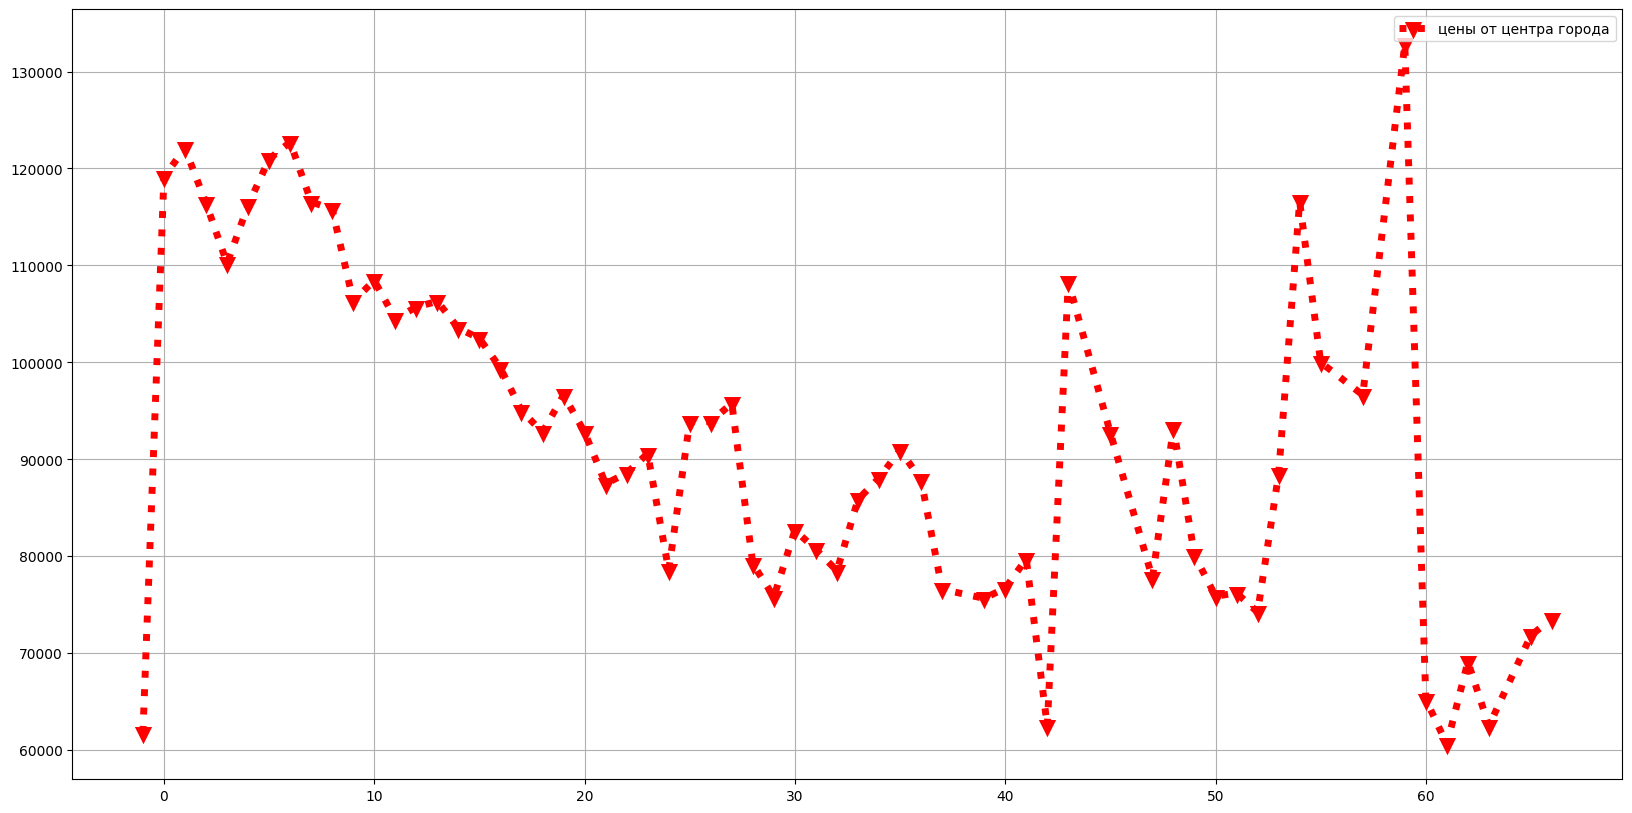

In [82]:
plt.figure(figsize=(20, 10))
plt.plot(km_price, 'v:r', label="цены от центра города", mec='r', lw=5, mew=5, ms=5)
plt.legend()
plt.grid(True)

Цены падают до 42 км затем растут до 58 км, возможно, элитные постройки стречаються за городом.  
* Значение "-1" те данные по которым отсутствует растояние до центра

### **Общий вывод**
1. Общая средняя площадь 'total_area' 54.36 кадратных метров
2. Жилая средняя площадь 'living_area' 31.34 кадратных метров
3. Cредняя Площадь кухни 'kitchen_area' 9.32 кадратных метров
4. Средняя Цена объекта 'last_price' стоимостью 4 839 970 рублей
5. Колисчество комнат 'rooms' от 0 до 5 комнат, с медианным количеством 2 комнаты
6. Высота потолков 'ceiling_height' от 2.46 м до 2.85, с медиальной высотой 2.63 м
7. Этаж квартиры 'floor' от 1 до 16, с медиальным этажом 5
8. Тип этажа картиры больше вего 'другой', с медиальным знаением
9. Общее количество этажей в доме 'floors_total' от 1 до 29 с медиальным значением 10,64
10. Расстояние до центра города в метрах 'cityCenters_nearest' от 181 метра до 66 тыс метров, с медиальным значением 14191 метров
11. Расстояние до ближайшего аэропорта 'airports_nearest' от 0 да 84869 метров, с медиальным значением 28794 метра
12. Расстояние до ближайшего парка 'parks_nearest' от 1 до 3190 метров
13. день и месяц публикации объявления: больше всего объявлений опубликовано в средине, вторник

*Cкорость продажи квартиры:*
1. Медиальное значение(mean) 128.75 дней, 
2. Среднее(std) 121.5 дней, 
3. Минимальное(min) 1 день, 
4. Быстрые продажи(25%) до 41 дня, 
5. Долгие продажи(75%) больше 183 дней, 
6. Максимальное(max) 512 дней.
*Самая большая количество объявлений в Санкт-Петербург(2 место по средней стоимости квадратного метра), а самая большая средняя цена квадратного метра в посёлоке Лисий Нос.*
*Стоимость квартиры*
1. Зависит от любой площади. Чем больше площадь тем дороже квартира. Оказывает сильнее влияние на цену общая площадь и жилая, слабее влияет площадь кухни. Менее всего зависит от площади в ценовом диапозоне от 2.23 до 4.84 млн.
2. Первый и последний этаж менее предпочтительне, чем другой.
3. Чем больше комнат, тем больше площадь и соответственно цена
4. Цены дешевле всего в воскресенье, июне, 2017 года. 
5. Цены падают до 42 км затем растут до 58 км, возможно, элитные постройки стречаються за городом
6. Дороже всего квартиры в Санкт-Петербурге

***Итого:***
Выгодней всего преобретать квартиры от 2.23 до 4.84 млн. руб. Первый и последний этаж, с наименьшим количеством комнат, в июне и в выходные. В течении 183 дней.